#  20 Nov 23 - Notes: Random Processes

Until now, all of our work has been with [deterministic systems](https://en.wikipedia.org/wiki/Deterministic_system). That is, we have a set of equations that allow us to describe the future of the system in space and time with certainty. Some differential equations are deterministic and all the ones that we have worked on so far are. Our analysis of ordinary differential equations, partial differential equations, and the wave equation have all been drawn from deterministic systems. We obtain equations or results that we can predict with (up to numerical) certainty. 

However, many processes in nature are not deterministic. These processes are stochastic, probabilistic, or [random](https://en.wikipedia.org/wiki/Randomness). We use these terms interchangeable, but ultimately the all describe a system with probabilistic states. These can be things like [the ideal gas in statistical mechanics](https://en.wikipedia.org/wiki/Ideal_gas) or [the hydrogen atom in quantum mechanics](https://en.wikipedia.org/wiki/Hydrogen_atom). But this work applies in contexts like the [stock market](https://bsj.berkeley.edu/how-scientists-are-using-statistical-physics-to-predict-the-stock-market/), [weather](https://en.wikipedia.org/wiki/Numerical_weather_prediction), [the spread of disease](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.104.014132), and even [information theory](https://en.wikipedia.org/wiki/Information_theory).

## Entropy

We will start with the concept of [Entropy](https://en.wikipedia.org/wiki/Entropy), which serves as a major organizing idea for many statistical physics models and results. For example, conservation of energy tells us that the same amount of energy is needed for a ball to change its height (moving up or down), but the concept of increased entropy indicates the ball won't spontaeously jump off the table. 

### Video

We will develop a mathematical definition of entropy, quoted below:

$$S = k \ln(\Omega)$$

where $k$ is the [Boltzmann constant](https://en.wikipedia.org/wiki/Boltzmann_constant) and $\Omega$ is the ["multiplicity"](https://en.wikipedia.org/wiki/Multiplicity_(statistical_mechanics)) of the system. The video below from [Veritasium](https://www.youtube.com/channel/UCHnyfMqiRRG1u-2MsSQLbXA) provides a nice introduction to the concept of entropy.

[![Entropy](https://markdown-videos-api.jorgenkh.no/youtube/DxL2HoqLbyA?width=720&height=405)](https://inv.tux.pizza/watch?v=DxL2HoqLbyA)

- Non-Commercial Link: [https://inv.tux.pizza/watch?v=DxL2HoqLbyA](https://inv.tux.pizza/watch?v=DxL2HoqLbyA)
- Commercial Link: [https://youtube.com/watch?v=DxL2HoqLbyA](https://youtube.com/watch?v=DxL2HoqLbyA)

## Modeling Randomness

Underlying much of what we will study is the concept of randomness. [Randomness](https://en.wikipedia.org/wiki/Randomness) is a field of study across many disciplines. Modeling randomness is a fundamentally different way of approaching physics because we often have to construct models that describe the probability of a system being in a particular state, we have to run those models for many iterations, and, then, we have to analyze the results of those models.

Because the concept of a [random variable](https://en.wikipedia.org/wiki/Random_variable) underlies everything we do, we will start with an exploration of probability and counting. In physics, those random variables correspond to the state of a system and the probability of that system being in that state. That tends to be a function of energy as we will see.

To begin we will start with the concepts of [microstates and macrostates](https://en.wikipedia.org/wiki/Microstate_(statistical_mechanics)). A microstate is a particular state of a system. For example, if we have ten coins that are different colors (distinguishable) and they have a certain pattern of heads and tails - that is a microstate. A macrostate is a collection of microstates that are indistinguishable, so remove the color of the coins when counting (e.g., 4 heads and 6 tails) that is a macrostate. 

* Microstate - tracks individual constituent states as if they were unique
* Macrostate - a group of microstates that share something 

### Video

Here's a short example with 3 coins, which we can simulate for N coins:

[![Microstates and Macrostates](https://markdown-videos-api.jorgenkh.no/youtube/9rYvq6kbUUA?width=720&height=405)](https://inv.tux.pizza/watch?v=9rYvq6kbUUA)

- Non-Commercial Link: [https://inv.tux.pizza/watch?v=9rYvq6kbUUA](https://inv.tux.pizza/watch?v=9rYvq6kbUUA)
- Commercial Link: [https://youtube.com/watch?v=9rYvq6kbUUA](https://youtube.com/watch?v=9rYvq6kbUUA)



### Coin Flipping Model

Below, we have written a couple functions that flip a coin `flip_coin()` and simulate flipping several coins (`trials`) and for a number of times (`flips`). We import a few relevant libaries including `random` and `seaborn` for plotting. We will use `seaborn` for plotting because it has a nice `histplot` function that we will use to plot the results of our coin flips.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def flip_coin(prob=0.5):
    """Simulate a single coin flip.
    default a fair coin."""
    return 1 if random.random() < prob else 0

def simulate_flips(trials, flips):
    """Simulate multiple trials of coin flips."""
    heads = np.zeros(trials)
    for i in range(trials):
        for j in range(flips):
            heads[i] += flip_coin()
    return heads

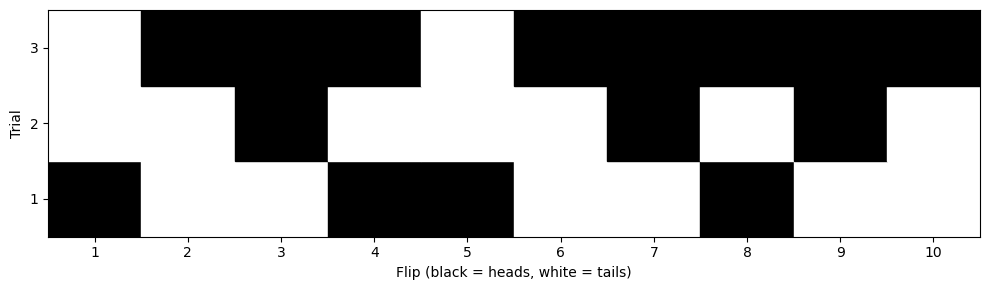

In [5]:
## Just code for a diagram; not needed in detail
num_trial = 3
coin_flips_per_trial = 10

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, num_trial))

# Simulate coin flips and create multiple rows
for row in range(num_trial):
    coin_flips = np.random.randint(0, 2, size=coin_flips_per_trial)
    
    # Plot each row of coin flips
    for i, flip in enumerate(coin_flips):
        color = 'black' if flip == 0 else 'white'
        ax.add_patch(plt.Rectangle((i, row), 1, 1, color=color))

# Set axis limits and labels
ax.set_xlim(0, coin_flips_per_trial)
ax.set_ylim(0, num_trial)
ax.set_yticks(np.arange(num_trial) + 0.5, np.arange(num_trial) + 1)
ax.set_xticks(np.arange(coin_flips_per_trial) + 0.5, np.arange(coin_flips_per_trial) + 1)

plt.ylabel('Trial')
plt.xlabel('Flip (black = heads, white = tails)')

# Show the plot
plt.tight_layout()


In [10]:
# Set the number of trials and flips
trial_sets = [10, 50, 100, 500, 1000, 10000]
flips = 4

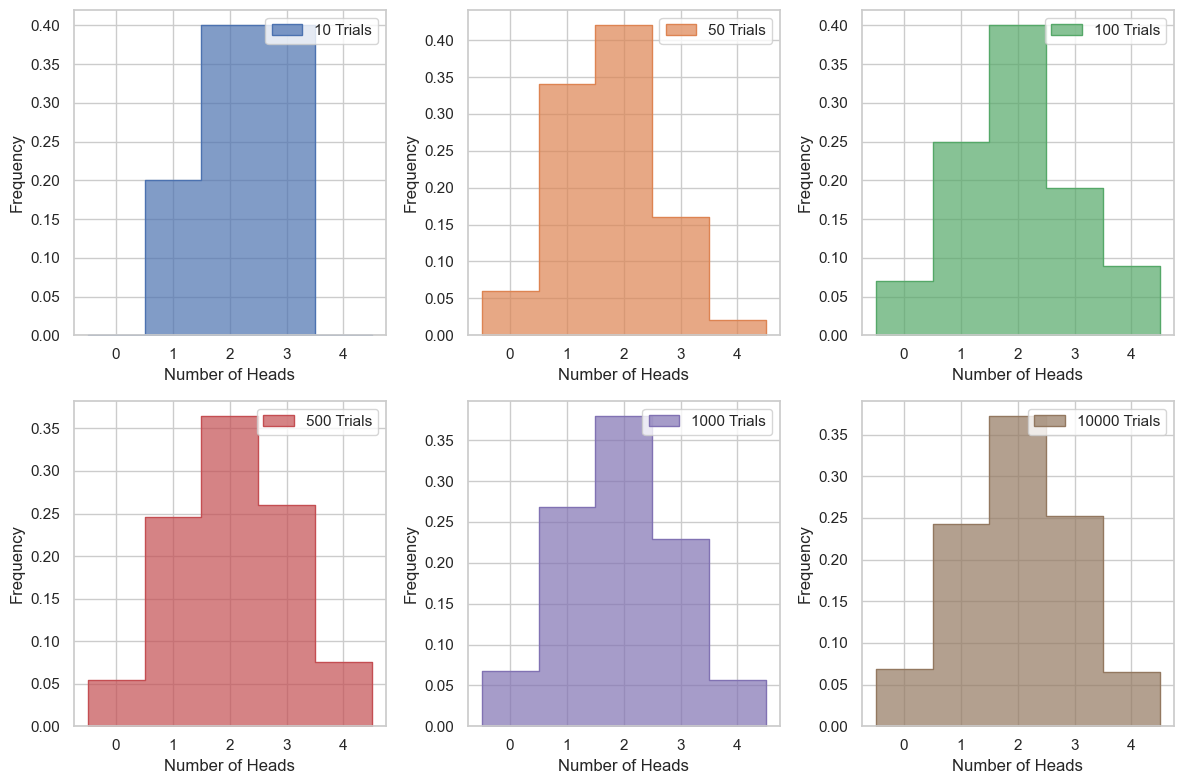

In [15]:
plt.figure(figsize=(12, 8))

# Set the seaborn style
sns.set(style="whitegrid")

for trials in trial_sets:
    
    index = trial_sets.index(trials)+1 # Set the subplot index
    n = len(trial_sets) # Set the number of subplots
    rows = int(np.ceil(n/2)) # Set the number of rows
    
    plt.subplot(2, rows, index)
    heads = simulate_flips(trials, flips)
    
    sns.histplot(heads, 
                 bins=np.arange(flips+2)-0.5, 
                 kde=False, stat="density", 
                 label=f'{trials} Trials', 
                 element="step", 
                 color=sns.color_palette()[index - 1],
                 alpha=0.7)
    plt.xlabel('Number of Heads')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()

## Poisson Processes

Many events in physics can be represented by a [Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution), which results from events that have the following properties:

* The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.
* The average rate at which events occur is independent of any occurrences. For simplicity, this is usually assumed to be constant, but may in practice vary with time.
* Two events cannot occur at exactly the same instant; instead, at each very small sub-interval, either exactly one event occurs, or no event occurs.

Oftentimes, it's the average rate (think lifetime of an isotope) that we think about as helping us decide. If it's true that the rate is roughly constant and the events are independent, then this modeling can work reasonably well. So an event can be random, but the average result should be relatively simple (e.g., a single average decay time), then we can consider the events Poisson distributed.

### Decay of an isotope

Consider a collection of $^{208}Tl$ that decays into $^{208}Pb$ with a half-life of 3.053 minutes. Note that any one atom decays randomly at a random time, but on average, we see that $1/e$ atoms decay in 3.053 minutes (this is characteristic of a Poisson Process).

The number of atoms $N$ that will remain in our sample (that is still be Thallium 208) will fall off exponentially over time (we could observe that from data):

$$N(t) = N(0)2^{-t/\tau}$$

where $\tau$ is the half-life. The fraction of remaining Thallium 208 atoms at any given time $t$ is:

$$\dfrac{N(t)}{N(0)} = 2^{-t/\tau}$$

The probability that an atom decayed into Lead 208 is just this number subtracted from one:

$$p(t) = 1 - 2^{-t/\tau}$$

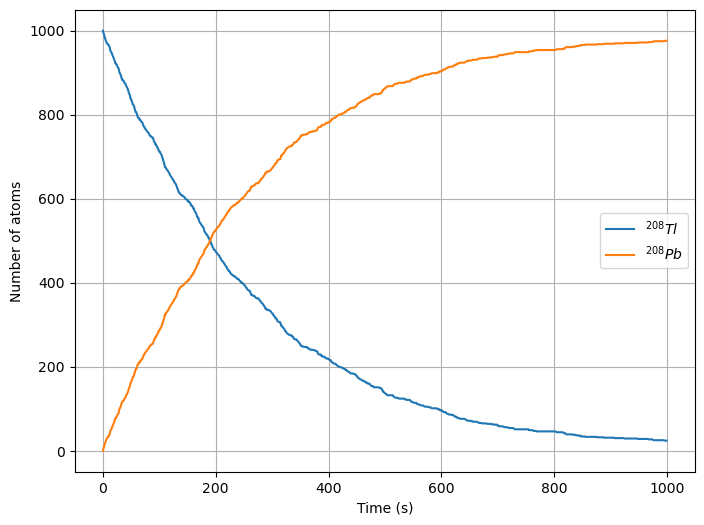

In [9]:
# Constants
NTl = 1000          # Starting Thallium Atoms
NPb = 0             # Starting Lead Atoms
tau = 3.053*60      # Half life in seconds
h = 1.0             # Time step between checking if a decay occurred
p = 1 - 2**(-h/tau) # Probability the decay occurs in that time elapsed
tmax = 1000         # Total time in seconds 

# List of plot points
tpoints = np.arange(0.0, tmax, h)
Tlpoints = []
Pbpoints = []
probabilities = []

# Model
for t in tpoints:
    
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    
    ## Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):        # For each atom in the sample
        if random.random() < p:   # Check if it decayed in the last dt 
            decay += 1
    NTl -= decay
    NPb += decay

# Plot the data
plt.figure(figsize=(8,6))
plt.plot(tpoints, Tlpoints, label=r'$^{208}Tl$')
plt.plot(tpoints, Pbpoints, label=r'$^{208}Pb$')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.grid()

## Additional Resources

### Videos

Here's an interesting application of the models of Poisson process and Queueing

[![Queuing theory and Poisson process](https://markdown-videos-api.jorgenkh.no/youtube/rBIQmwaoZfs?width=720&height=405)](https://inv.tux.pizza/watch?v=rBIQmwaoZfs)

- Non-Commercial Link: [https://inv.tux.pizza/watch?v=rBIQmwaoZfs](https://inv.tux.pizza/watch?v=rBIQmwaoZfs)
- Commercial Link: [https://youtube.com/watch?v=rBIQmwaoZfs](https://youtube.com/watch?v=rBIQmwaoZfs)

